In [27]:
import numpy as np
import matplotlib.pyplot as plt

Определение дифференциального уравнения

In [28]:
def diff(x, y):
    return y / x + x * np.cos(x)

Точное решение

In [29]:
def solution(x):
    return x * np.sin(x)

Метод Рунге-Кутты 4-ого порядка

In [30]:
def runge_kutta_4(f, x0, y0, h, x_end):
    x_val = [x0]
    y_val = [y0]
    x = x0
    y = y0
    while x < x_end:
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x = x + h
        x_val.append(x)
        y_val.append(y)
    return np.array(x_val), np.array(y_val)

In [ ]:
def runge_kutta_step(f, x, y, h, k1=None):
    if k1 is None:
        k1 = f(x, y)
    k2 = h * f(x + h / 2, y + k1 / 2)
    k3 = h * f(x + h / 2, y + k2 / 2)
    k4 = h * f(x + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

Параметры задачи

In [32]:
a = np.pi / 2
b = 2 * np.pi
y0 = solution(a)

Исследования на 7 баллов

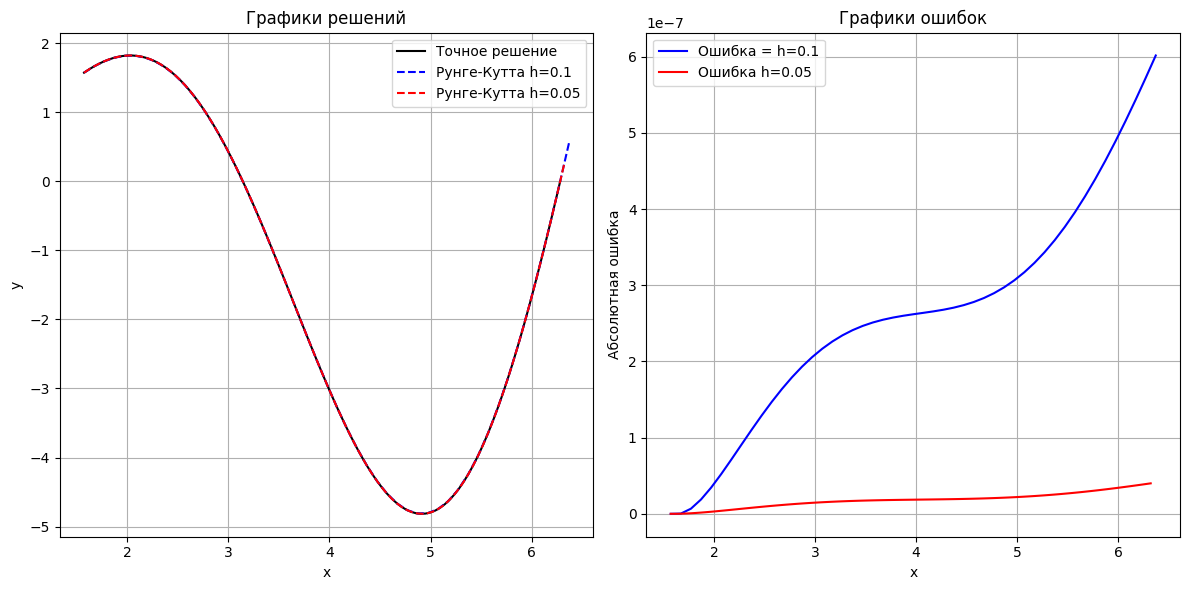

In [33]:
h1 = 0.1
h2 = 0.05

x_rk4_1, y_rk4_1 = runge_kutta_4(diff, a, y0, h1, b)
x_rk4_2, y_rk4_2 = runge_kutta_4(diff, a, y0, h2, b)

error1 = np.abs(y_rk4_1 - solution(x_rk4_1))
error2 = np.abs(y_rk4_2 - solution(x_rk4_2))

x_exact = np.linspace(a, b, 100)
y_exact = solution(x_exact)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_exact, y_exact, 'k-', label='Точное решение')
plt.plot(x_rk4_1, y_rk4_1, 'b--', label=f'Рунге-Кутта h={h1}')
plt.plot(x_rk4_2, y_rk4_2, 'r--', label=f'Рунге-Кутта h={h2}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Графики решений')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x_rk4_1, error1, 'b-', label=f'Ошибка = h={h1}')
plt.plot(x_rk4_2, error2, 'r-', label=f'Ошибка h={h2}')
plt.xlabel('x')
plt.ylabel('Абсолютная ошибка')
plt.legend()
plt.title('Графики ошибок')
plt.grid()

plt.tight_layout()

Адаптивный метод с контролем точности по правилу Рунге

In [ ]:
def adapt_rk(f, x0, y0, x_end, tol=1e-6, h_init=0.1):
    x_val = [x0]
    y_val = [y0]
    h_val = []

    x = x0
    y = y0
    h = h_init
    while x < x_end:
        if x + 2 * h > x_end:
            h = (x_end - x) / 2

        y1 = runge_kutta_step(f, x, y, h)
        y2 = runge_kutta_step(f, x + h, y1, h)
        y_one_step = runge_kutta_step(f, x, y, 2 * h)

        error = np.abs(y2 - y_one_step) / 15

        if error < tol:
            x = x + 2 * h
            y_new = y2 + (y2 - y_one_step) / 15
            x_val.append(x)
            y_val.append(y2)
            h_val.append(2 * h)
            y = y_new

            if error < tol / 32:
                h *= 2
        else:
            h /= 2

    return np.array(x_val), np.array(y_val), np.array(h_val)

Применение адаптивного метода

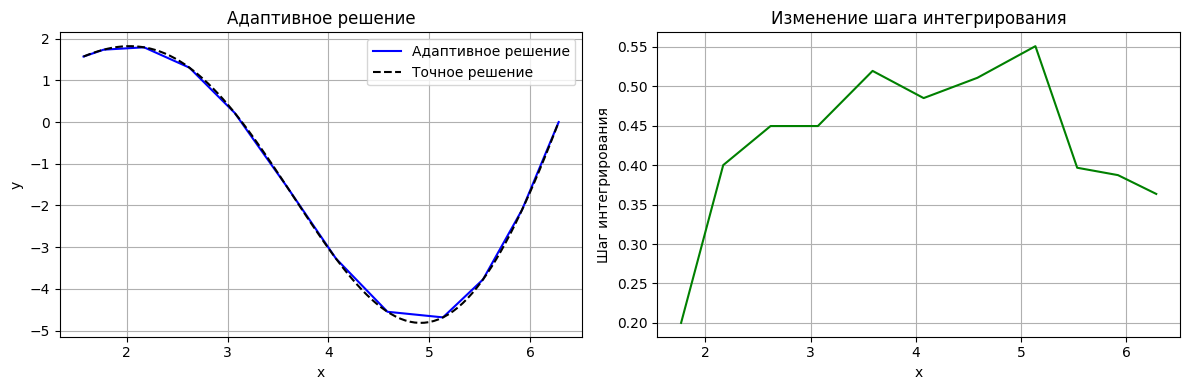

In [35]:
x_adapt, y_adapt, h_adapt = adapt_rk(diff, a, y0, b, tol=1e-6)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x_adapt, y_adapt, 'b-', label='Адаптивное решение')
plt.plot(x_exact, y_exact, 'k--', label='Точное решение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Адаптивное решение')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x_adapt[1:], h_adapt, 'g-')
plt.xlabel('x')
plt.ylabel('Шаг интегрирования')
plt.title('Изменение шага интегрирования')
plt.grid()

plt.tight_layout()

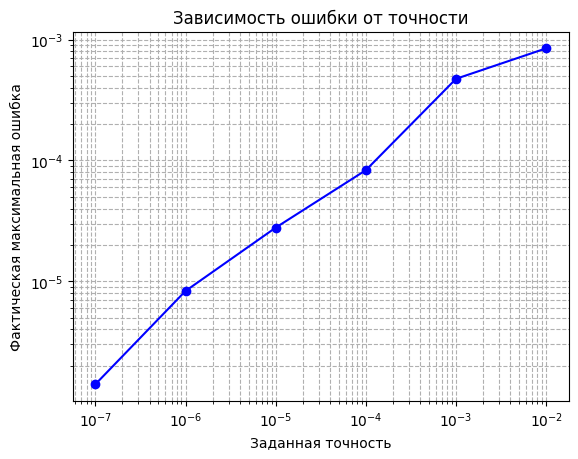

In [36]:
def plot_error(f, solution, x0, y0, x_end, tols):
    max_errors = []
    for tol in tols:
        x_adapt, y_adapt, _ = adapt_rk(f, x0, y0, x_end, tol)
        y_exact = solution(x_adapt)
        error = np.max(np.abs(y_adapt - y_exact))
        max_errors.append(error)

    plt.figure()
    plt.loglog(tols, max_errors, 'bo-')
    plt.xlabel('Заданная точность')
    plt.ylabel('Фактическая максимальная ошибка')
    plt.title('Зависимость ошибки от точности')
    plt.grid(True, which="both", ls="--")
    plt.show()

tols = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
plot_error(diff, solution, a, y0, b, tols)

Исследования на 8 баллов

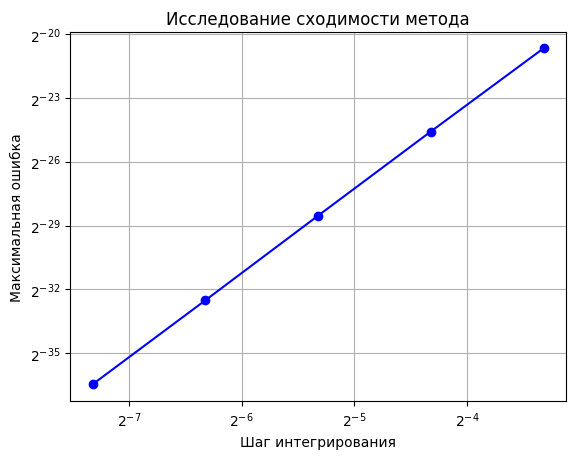

In [37]:
hs = [0.1, 0.05, 0.025, 0.0125, 0.00625]
errors = []
for h in hs:
    x, y = runge_kutta_4(diff, a, y0, h, b)
    error = np.max(np.abs(y - solution(x)))
    errors.append(error)

plt.figure()
plt.loglog(hs, errors, 'bo-', base=2)
plt.xlabel('Шаг интегрирования')
plt.ylabel('Максимальная ошибка')
plt.title('Исследование сходимости метода')
plt.grid()

Оценка порядка метода

In [38]:
log_hs = np.log2(hs)
log_errors = np.log2(errors)
order = np.polyfit(log_hs, log_errors, 1)[0]
print(f'Оценка порядка метода: {-order:.2f}')

Оценка порядка метода: -3.95


Исследование устойчивости к возмущениям

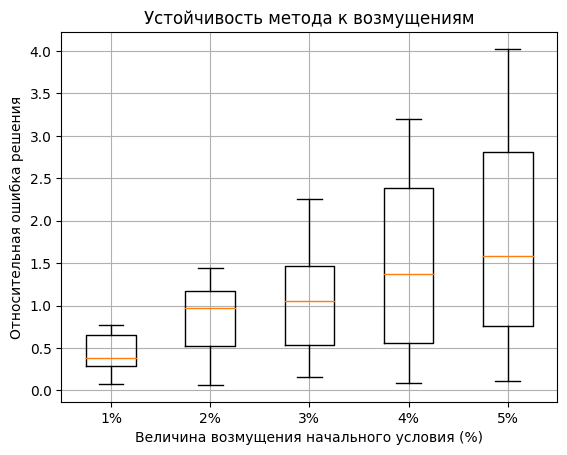

In [ ]:
perturbations = [0.01, 0.02, 0.03, 0.04, 0.05]
num = 20
res = []

for p in perturbations:
    rel_errors = []
    for _ in range(num):
        perturbed_y0 = y0 * (1 + np.random.uniform(-p, p))
        x, y = runge_kutta_4(diff, a, perturbed_y0, 0.05, b)
        exact = solution(x)
        rel_error = np.max(np.abs(y - exact) / (np.abs(exact) + 1e-12))
        rel_errors.append(rel_error)
    res.append(rel_errors)

plt.figure()
plt.boxplot(res, labels=[f'{p * 100:.0f}%' for p in perturbations])
plt.xlabel('Величина возмущения начального условия (%)')
plt.ylabel('Относительная ошибка решения')
plt.title('Устойчивость метода к возмущениям')
plt.grid()
